<h1>Pymaceuticals Data Analysis</h1>


## Observations and Insights

## Dependencies and starter code

In [174]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
study_data.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume_mm3"})
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_calc=study_data[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
summary_data_grouped = summary_calc.groupby(['Drug Regimen','Timepoint'])
tumor_mean = summary_data_grouped['Tumor Volume (mm3)'].mean()
df = tumor_mean.unstack()
df["Tumor Volume Mean (mm3)"] = df.mean(axis=1)
df["Tumor Volume Median (mm3)"] = df.median(axis=1)
df["Tumor Volume Variance (mm3)"] = df.var(axis=1)
df["Tumor Volume Std Dev (mm3)"] = df.std(axis=1)
df["Tumor Volume SEM (mm3)"] = df.sem(axis=1)
summary = df[["Tumor Volume Mean (mm3)","Tumor Volume Median (mm3)","Tumor Volume Variance (mm3)","Tumor Volume Std Dev (mm3)", "Tumor Volume SEM (mm3)"]]
summary = summary.sort_values(by="Tumor Volume Mean (mm3)", ascending=True)
summary= summary.reset_index()
summary


Timepoint,Drug Regimen,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Std Dev (mm3),Tumor Volume SEM (mm3)
0,Ramicane,39.986931,39.986931,8.697473,9.125935,3.101929
1,Capomulin,40.485084,40.485084,7.712616,9.470372,3.171089
2,Ceftamin,53.752434,53.752434,34.308877,7.780149,3.752831
3,Zoniferol,54.660451,54.660451,40.226274,7.273284,3.796605
4,Infubinol,54.911474,54.911474,40.585515,7.279461,3.813137
5,Propriva,54.911934,54.911934,40.324796,7.302906,3.813413
6,Naftisol,55.891024,55.891024,56.021513,7.166196,3.937486
7,Stelasyn,55.949437,55.949437,51.055892,6.974475,3.906065
8,Placebo,56.012209,56.012209,50.283696,6.972638,3.905873
9,Ketapril,56.806906,56.806906,58.402877,7.330205,4.011774


## Bar plots

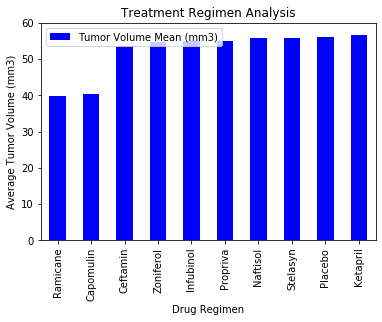

In [137]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

x_axis= 'Drug Regimen'
y_axis = 'Tumor Volume Mean (mm3)'
pandas_bar = summary.plot.bar(x_axis, y_axis, title='Treatment Regimen Analysis', xlim=(-1,10), ylim=(0,60), color="blue")
pandas_bar.set_ylabel("Average Tumor Volume (mm3)")
pandas_bar

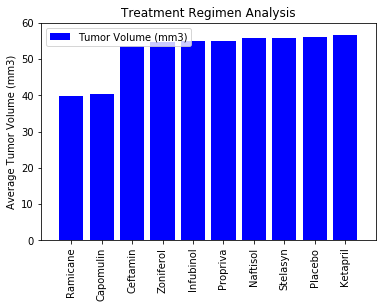

In [138]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis= summary['Drug Regimen']
y_axis = summary["Tumor Volume Mean (mm3)"]
bar_chart = plt.bar(x_axis, y_axis, color = 'b', alpha= 1, align='center', label='Tumor Volume (mm3)') 
plt.xlim(-1,10)
plt.ylim(0,60)
plt.title('Treatment Regimen Analysis')
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(loc='best')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')


plt.show()

## Pie plots

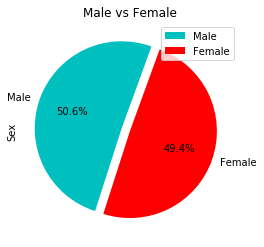

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male = (len(study_data.loc[study_data["Sex"] == "Male",:])/len(study_data["Sex"]))*100
female = (len(study_data.loc[study_data["Sex"] == "Female",:])/len(study_data["Sex"]))*100
df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
df = df.set_index('Mice')

plot = df.plot.pie(y="Sex", figsize =(4, 4), explode=(0.1,0), colors = 'cr', autopct='%1.1f%%',startangle = 70, title="Male vs Female")

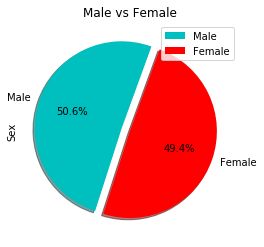

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = (len(study_data.loc[study_data["Sex"] == "Male",:])/len(study_data["Sex"]))*100
female = (len(study_data.loc[study_data["Sex"] == "Female",:])/len(study_data["Sex"]))*100
df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
df = df.set_index('Mice')
sizes =[male, female]
colors = ["c", "r"]
labels = ["Male","Female"]
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
plt.legend(labels, loc='best')
explode = (0.1, 0)
pie_chart = plt.pie(sizes, labels = labels,explode=explode, autopct = '%1.1f%%', colors=colors, startangle = 70, shadow = True)
plt.legend(labels, loc='best')
plt.title('Male vs Female')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [301]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
most_promise=study_data[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]\
        .groupby(["Mouse ID", "Drug Regimen" ]).last()\
        .sort_values(by = "Drug Regimen", ascending = True).reset_index()
most_promise.set_index(["Drug Regimen", "Mouse ID"], inplace =True)

capomulin = most_promise.loc['Capomulin']["Tumor Volume (mm3)"]
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
lower_capomulin = quartiles_capomulin[.25]
upper_capomulin = quartiles_capomulin[.75]
iqr_capomulin = upper_capomulin-lower_capomulin

ramicane = most_promise.loc['Ramicane']["Tumor Volume (mm3)"]
quartiles_ramicane = ramicane.quantile([.25,.5,.75])
lower_ramicane = quartiles_ramicane[.25]
upper_ramicane = quartiles_ramicane[.75]
iqr_ramicane = upper_ramicane-lower_ramicane

infubinol = most_promise.loc['Infubinol']["Tumor Volume (mm3)"]
quartiles_infubinol = infubinol.quantile([.25,.5,.75])
lower_infubinol = quartiles_infubinol[.25]
upper_infubinol = quartiles_infubinol[.75]
iqr_infubinol = upper_infubinol-lower_infubinol

ceftamin = most_promise.loc['Ceftamin']["Tumor Volume (mm3)"]
quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
lower_ceftamin = quartiles_ceftamin[.25]
upper_ceftamin = quartiles_ceftamin[.75]
iqr_ceftamin = upper_ceftamin-lower_ceftamin

most_promise

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    g316               40.159220
             s710               40.728578
             t565               34.455298
             r944               41.581521
             r554               32.377357
...                                   ...
Zoniferol    f394               47.033100
             b313               55.745146
             f545               73.324432
             q511               68.611061
             c559               61.840058

[249 rows x 1 columns]

In [302]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
most_promise = most_promise.reset_index(["Drug Regimen", "Mouse ID"], drop =False)
x=list(most_promise.loc['Mouse ID'])
#data = most_promise["Tumor Volume (mm3)"]
#plt.bar(x, data)
x

KeyError: 'Mouse ID'

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen